Q1:Basic EDA (Exploratory Data Analysis)

In [7]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "C:\\Users\\hp\\house_price.csv"
df = pd.read_csv(file_path)

# Display basic dataset info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [9]:
# Display first 5 rows
print("\nFirst 5 Rows of Dataset:")
print(df.head())


First 5 Rows of Dataset:
                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  


In [11]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())



Missing Values in Each Column:
location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [13]:
# Summary statistics of numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


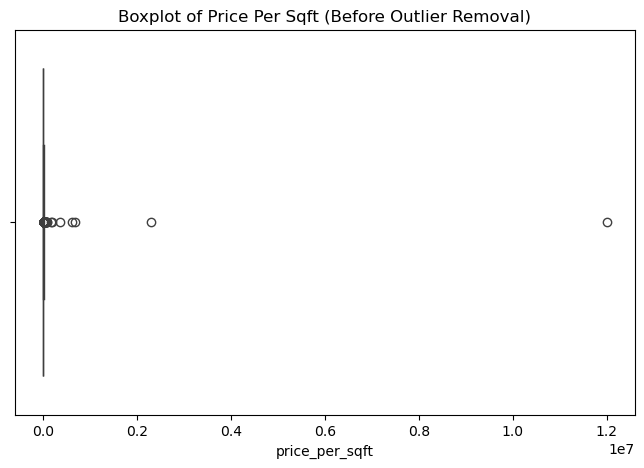

In [15]:
# Boxplot to check for outliers in 'price_per_sqft'
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["price_per_sqft"])
plt.title("Boxplot of Price Per Sqft (Before Outlier Removal)")
plt.show()

Q2:Detect and Remove Outliers


In [20]:
from scipy.stats import zscore

# 1. Mean and Standard Deviation Method
mean = df["price_per_sqft"].mean()
std_dev = df["price_per_sqft"].std()

upper_limit_std = mean + 3 * std_dev
lower_limit_std = mean - 3 * std_dev

df_std_filtered = df[(df["price_per_sqft"] >= lower_limit_std) & (df["price_per_sqft"] <= upper_limit_std)]


In [22]:
# 2. Percentile Method (5th and 95th Percentile)
lower_limit_perc = np.percentile(df["price_per_sqft"], 5)
upper_limit_perc = np.percentile(df["price_per_sqft"], 95)

df_perc_filtered = df[(df["price_per_sqft"] >= lower_limit_perc) & (df["price_per_sqft"] <= upper_limit_perc)]

In [24]:
# 3. IQR Method
Q1 = df["price_per_sqft"].quantile(0.25)
Q3 = df["price_per_sqft"].quantile(0.75)
IQR = Q3 - Q1

upper_limit_iqr = Q3 + 1.5 * IQR
lower_limit_iqr = Q1 - 1.5 * IQR

df_iqr_filtered = df[(df["price_per_sqft"] >= lower_limit_iqr) & (df["price_per_sqft"] <= upper_limit_iqr)]

In [26]:
# 4. Z-Score Method
df["z_score"] = zscore(df["price_per_sqft"])
df_z_filtered = df[(df["z_score"].abs() < 3)]

In [28]:
# Check dataset sizes after filtering
df_filtered_sizes = {
    "Original": len(df),
    "Std Dev Method": len(df_std_filtered),
    "Percentile Method": len(df_perc_filtered),
    "IQR Method": len(df_iqr_filtered),
    "Z-Score Method": len(df_z_filtered)
}
print("\nDataset sizes after outlier removal:")
print(df_filtered_sizes)


Dataset sizes after outlier removal:
{'Original': 13200, 'Std Dev Method': 13195, 'Percentile Method': 11880, 'IQR Method': 11935, 'Z-Score Method': 13195}


Q3: Compare Outlier Removal Methods with Boxplots

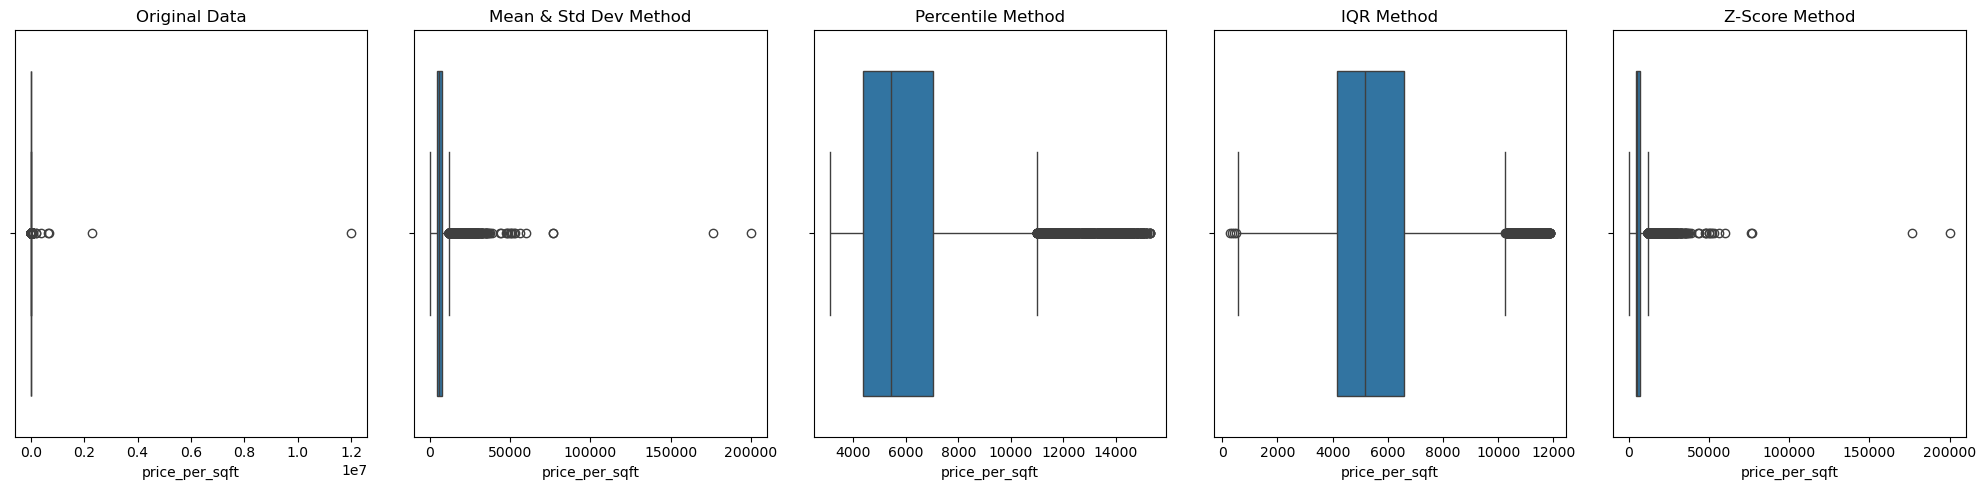

In [33]:
# Boxplots to compare different outlier removal methods
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

sns.boxplot(x=df["price_per_sqft"], ax=axes[0])
axes[0].set_title("Original Data")

sns.boxplot(x=df_std_filtered["price_per_sqft"], ax=axes[1])
axes[1].set_title("Mean & Std Dev Method")

sns.boxplot(x=df_perc_filtered["price_per_sqft"], ax=axes[2])
axes[2].set_title("Percentile Method")

sns.boxplot(x=df_iqr_filtered["price_per_sqft"], ax=axes[3])
axes[3].set_title("IQR Method")

sns.boxplot(x=df_z_filtered["price_per_sqft"], ax=axes[4])
axes[4].set_title("Z-Score Method")

plt.tight_layout()
plt.show()

Q4: Histogram & Normality Check

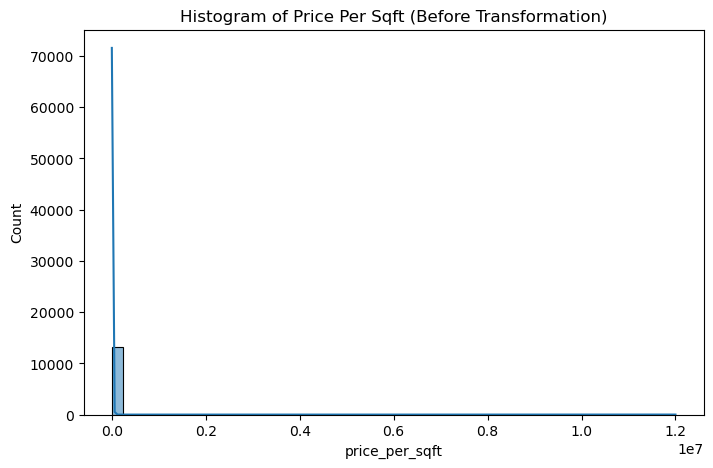

Skewness before transformation: 108.26875024325159
Kurtosis before transformation: 12090.633538860382


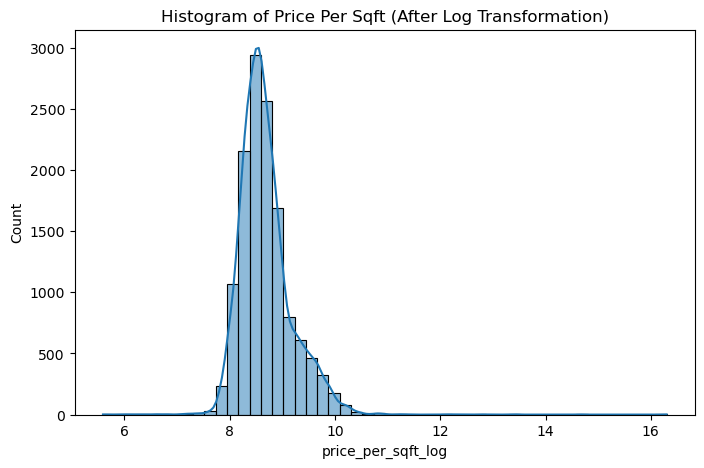

Skewness after transformation: 1.4003259019533636
Kurtosis after transformation: 9.203000543610957


In [36]:
from scipy.stats import skew, kurtosis

# Plot histogram before transformation
plt.figure(figsize=(8, 5))
sns.histplot(df["price_per_sqft"], bins=50, kde=True)
plt.title("Histogram of Price Per Sqft (Before Transformation)")
plt.show()

# Skewness & Kurtosis before transformation
skew_before = skew(df["price_per_sqft"])
kurt_before = kurtosis(df["price_per_sqft"])

print(f"Skewness before transformation: {skew_before}")
print(f"Kurtosis before transformation: {kurt_before}")

# Apply log transformation to reduce skewness
df["price_per_sqft_log"] = np.log1p(df["price_per_sqft"])

# Plot histogram after transformation
plt.figure(figsize=(8, 5))
sns.histplot(df["price_per_sqft_log"], bins=50, kde=True)
plt.title("Histogram of Price Per Sqft (After Log Transformation)")
plt.show()

# Skewness & Kurtosis after transformation
skew_after = skew(df["price_per_sqft_log"])
kurt_after = kurtosis(df["price_per_sqft_log"])

print(f"Skewness after transformation: {skew_after}")
print(f"Kurtosis after transformation: {kurt_after}")

Q5: Correlation & Heatmap

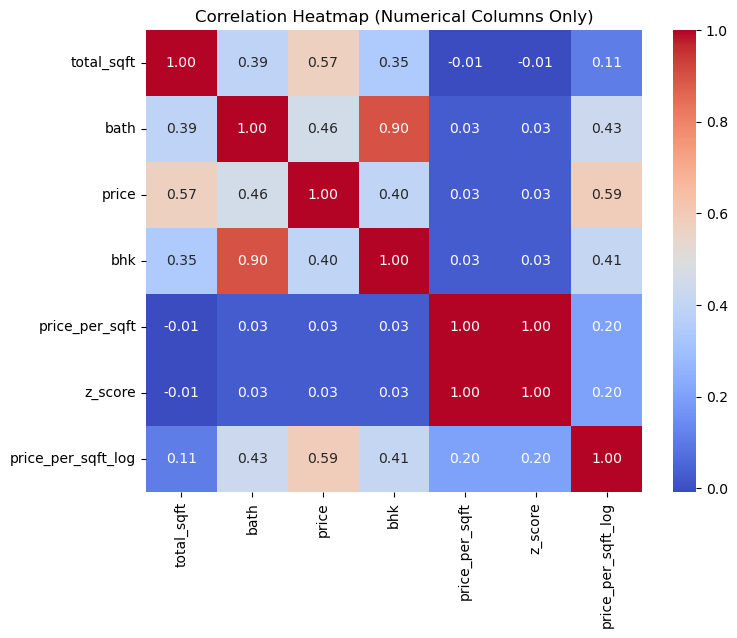

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_df = df.select_dtypes(include=["number"])  # Excludes categorical columns

# Compute correlation matrix
correlation_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Columns Only)")
plt.show()

Q6: Scatter Plots to Check Correlation

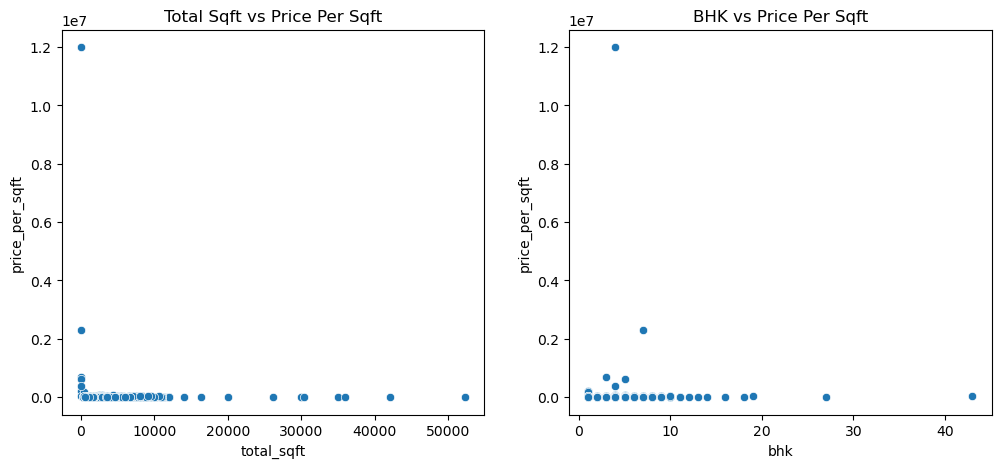

In [44]:
# Scatter plots for correlation check
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df["total_sqft"], y=df["price_per_sqft"])
plt.title("Total Sqft vs Price Per Sqft")

plt.subplot(1, 2, 2)
sns.scatterplot(x=df["bhk"], y=df["price_per_sqft"])
plt.title("BHK vs Price Per Sqft")

plt.show()